# HOMEWORK Answers:

Q1) 19
Q2) The standard deviation on the trips duration is: 0 days 00:00:34.851053592 (I select option 32.59) 
Q3) Fraction is 99.970654 ( I select option 98%)
Q4) The dimension is: (2964624, 521) .  ( I Select 515 )
Q5) Not complete
Q6) Not complete

I did Q4 from an stored YT video, and I try Q5 and Q6, not finished.  Thanks! 

In [3]:
import pandas as pd

from sklearn.feature_extraction import DictVectorizer
from sklearn.linear_model import LinearRegression

from sklearn.metrics import mean_squared_error

In [4]:
!pip install pyarrow

# To filter January data

In [5]:
df = pd.read_parquet('https://d37ci6vzurychx.cloudfront.net/trip-data/yellow_tripdata_2024-01.parquet')

In [6]:
df.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,Airport_fee
0,2,2024-01-01 00:57:55,2024-01-01 01:17:43,1.0,1.72,1.0,N,186,79,2,17.7,1.0,0.5,0.00,0.0,1.0,22.70,2.5,0.0
1,1,2024-01-01 00:03:00,2024-01-01 00:09:36,1.0,1.80,1.0,N,140,236,1,10.0,3.5,0.5,3.75,0.0,1.0,18.75,2.5,0.0
2,1,2024-01-01 00:17:06,2024-01-01 00:35:01,1.0,4.70,1.0,N,236,79,1,23.3,3.5,0.5,3.00,0.0,1.0,31.30,2.5,0.0
3,1,2024-01-01 00:36:38,2024-01-01 00:44:56,1.0,1.40,1.0,N,79,211,1,10.0,3.5,0.5,2.00,0.0,1.0,17.00,2.5,0.0
4,1,2024-01-01 00:46:51,2024-01-01 00:52:57,1.0,0.80,1.0,N,211,148,1,7.9,3.5,0.5,3.20,0.0,1.0,16.10,2.5,0.0


In [7]:
import sklearn

sklearn.__version__

'1.0.2'

# Q1. Downloading the data

We'll use the same NYC taxi dataset, but instead of "Green Taxi Trip Records", we'll use "Yellow Taxi Trip Records".

Download the data for January and February 2023.

Read the data for January. How many columns are there?

16
17
18
19

In [8]:
num_col = len(df.columns)

print(f'There are: {num_col} columns.')

There are: 19 columns.


# Q2. Computing duration
Now let's compute the duration variable. It should contain the duration of a ride in minutes.

What's the standard deviation of the trips duration in January?

32.59
42.59
52.59
62.59

In [9]:
df_Jan24 = df[(df['tpep_pickup_datetime'] >= "23:59:59") & (df['tpep_pickup_datetime'] <= "00:00:00")] 

In [10]:
df['duration'] = (df.tpep_dropoff_datetime - df.tpep_pickup_datetime) / 60

In [11]:
df.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,Airport_fee,duration
0,2,2024-01-01 00:57:55,2024-01-01 01:17:43,1.0,1.72,1.0,N,186,79,2,17.7,1.0,0.5,0.00,0.0,1.0,22.70,2.5,0.0,0 days 00:00:19.800000
1,1,2024-01-01 00:03:00,2024-01-01 00:09:36,1.0,1.80,1.0,N,140,236,1,10.0,3.5,0.5,3.75,0.0,1.0,18.75,2.5,0.0,0 days 00:00:06.600000
2,1,2024-01-01 00:17:06,2024-01-01 00:35:01,1.0,4.70,1.0,N,236,79,1,23.3,3.5,0.5,3.00,0.0,1.0,31.30,2.5,0.0,0 days 00:00:17.916666666
3,1,2024-01-01 00:36:38,2024-01-01 00:44:56,1.0,1.40,1.0,N,79,211,1,10.0,3.5,0.5,2.00,0.0,1.0,17.00,2.5,0.0,0 days 00:00:08.300000
4,1,2024-01-01 00:46:51,2024-01-01 00:52:57,1.0,0.80,1.0,N,211,148,1,7.9,3.5,0.5,3.20,0.0,1.0,16.10,2.5,0.0,0 days 00:00:06.100000


In [12]:
std_duration = df.duration.std() 
print(f'The standard deviation on the trips duration is: {std_duration} .')

The standard deviation on the trips duration is: 0 days 00:00:34.851053592 .


# Q3. Dropping outliers

Next, we need to check the distribution of the duration variable. There are some outliers. Let's remove them and keep only the records where the duration was between 1 and 60 minutes (inclusive).

What fraction of the records left after you dropped the outliers?

90%
92%
95%
98%

In [13]:
df['duration'].describe()

count                        2964624
mean       0 days 00:00:15.612950618
std        0 days 00:00:34.851053592
min      -1 days +23:59:46.433333334
25%           0 days 00:00:07.150000
50%        0 days 00:00:11.633333333
75%        0 days 00:00:18.683333333
max           0 days 02:37:35.400000
Name: duration, dtype: object

In [14]:
df['tpep_pickup_datetime'].min()

Timestamp('2002-12-31 22:59:39')

In [15]:
df['tpep_pickup_datetime'].max()

Timestamp('2024-02-01 00:01:15')

<AxesSubplot:>

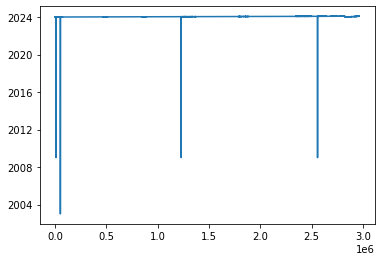

In [16]:
df.tpep_pickup_datetime.plot.line()

In [17]:
df[(df['duration'] < "23:59:59") & (df['duration'] > "00:00:00") & (df['tpep_pickup_datetime'] > '2024-01-01')]

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,Airport_fee,duration
0,2,2024-01-01 00:57:55,2024-01-01 01:17:43,1.0,1.72,1.0,N,186,79,2,17.70,1.00,0.5,0.00,0.00,1.0,22.70,2.5,0.0,0 days 00:00:19.800000
1,1,2024-01-01 00:03:00,2024-01-01 00:09:36,1.0,1.80,1.0,N,140,236,1,10.00,3.50,0.5,3.75,0.00,1.0,18.75,2.5,0.0,0 days 00:00:06.600000
2,1,2024-01-01 00:17:06,2024-01-01 00:35:01,1.0,4.70,1.0,N,236,79,1,23.30,3.50,0.5,3.00,0.00,1.0,31.30,2.5,0.0,0 days 00:00:17.916666666
3,1,2024-01-01 00:36:38,2024-01-01 00:44:56,1.0,1.40,1.0,N,79,211,1,10.00,3.50,0.5,2.00,0.00,1.0,17.00,2.5,0.0,0 days 00:00:08.300000
4,1,2024-01-01 00:46:51,2024-01-01 00:52:57,1.0,0.80,1.0,N,211,148,1,7.90,3.50,0.5,3.20,0.00,1.0,16.10,2.5,0.0,0 days 00:00:06.100000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2964619,2,2024-01-31 23:45:59,2024-01-31 23:54:36,NaN,3.18,NaN,None,107,263,0,15.77,0.00,0.5,2.00,0.00,1.0,21.77,NaN,NaN,0 days 00:00:08.616666666
2964620,1,2024-01-31 23:13:07,2024-01-31 23:27:52,NaN,4.00,NaN,None,114,236,0,18.40,1.00,0.5,2.34,0.00,1.0,25.74,NaN,NaN,0 days 00:00:14.750000
2964621,2,2024-01-31 23:19:00,2024-01-31 23:38:00,NaN,3.33,NaN,None,211,25,0,19.97,0.00,0.5,0.00,0.00,1.0,23.97,NaN,NaN,0 days 00:00:19
2964622,2,2024-01-31 23:07:23,2024-01-31 23:25:14,NaN,3.06,NaN,None,107,13,0,23.88,0.00,0.5,5.58,0.00,1.0,33.46,NaN,NaN,0 days 00:00:17.850000


In [18]:
  df_clean = df[(df['duration'] < "23:59:59") & (df['duration'] > "00:00:00") & (df['tpep_pickup_datetime'] > '2024-01-01')]

<AxesSubplot:>

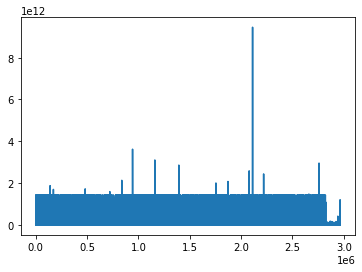

In [19]:
  df_clean.duration.plot.line() 

<AxesSubplot:>

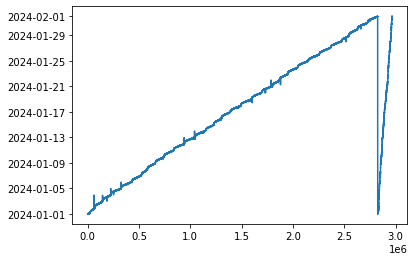

In [20]:
df_clean.tpep_pickup_datetime.plot.line()

In [19]:
df_clean.describe()

,VendorID,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,Airport_fee,duration
count,2.963754e+06,2.823703e+06,2.963754e+06,2.823703e+06,2.963754e+06,2.963754e+06,2.963754e+06,2.963754e+06,2.963754e+06,2.963754e+06,2.963754e+06,2.963754e+06,2.963754e+06,2.963754e+06,2.823703e+06,2.823703e+06,2963754
mean,1.754303e+00,1.339304e+00,3.653027e+00,2.067938e+00,1.660133e+02,1.650938e+02,1.161127e+00,1.816763e+01,1.451430e+00,4.834136e-01,3.336566e+00,5.270291e-01,9.756981e-01,2.679520e+01,2.256344e+00,1.411600e-01,0 days 00:00:15.617557074
std,4.321268e-01,8.502153e-01,2.254957e+02,9.817055e+00,6.362151e+01,6.930630e+01,5.807551e-01,1.831719e+01,1.803999e+00,1.177002e-01,3.896373e+00,2.127688e+00,2.182385e-01,2.287899e+01,8.230239e-01,4.876252e-01,0 days 00:00:34.855128758
min,1.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,-8.990000e+02,-7.500000e+00,-5.000000e-01,-8.000000e+01,-8.000000e+01,-1.000000e+00,-9.000000e+02,-2.500000e+00,-1.750000e+00,0 days 00:00:00.016666666
25%,2.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.320000e+02,1.140000e+02,1.000000e+00,8.600000e+00,0.000000e+00,5.000000e-01,1.000000e+00,0.000000e+00,1.000000e+00,1.538000e+01,2.500000e+00,0.000000e+00,0 days 00:00:07.150000
50%,2.000000e+00,1.000000e+00,1.680000e+00,1.000000e+00,1.620000e+02,1.620000e+02,1.000000e+00,1.280000e+01,1.000000e+00,5.000000e-01,2.700000e+00,0.000000e+00,1.000000e+00,2.010000e+01,2.500000e+00,0.000000e+00,0 days 00:00:11.633333333
75%,2.000000e+00,1.000000e+00,3.110000e+00,1.000000e+00,2.340000e+02,2.340000e+02,1.000000e+00,2.050000e+01,2.500000e+00,5.000000e-01,4.120000e+00,0.000000e+00,1.000000e+00,2.856000e+01,2.500000e+00,0.000000e+00,0 days 00:00:18.683333333
max,6.000000e+00,9.000000e+00,3.127223e+05,9.900000e+01,2.650000e+02,2.650000e+02,4.000000e+00,2.221300e+03,1.425000e+01,4.000000e+00,4.280000e+02,1.159200e+02,1.000000e+00,2.225300e+03,2.500000e+00,1.750000e+00,0 days 02:37:35.400000


In [21]:
fract = ( df_clean.count() / df.count() ) * 100

In [22]:
print(f' Q3. The fraction is: {fract}')

 Q3. The fraction is: VendorID                 99.970114
tpep_pickup_datetime     99.970114
tpep_dropoff_datetime    99.970114
passenger_count          99.972561
trip_distance            99.970114
RatecodeID               99.972561
store_and_fwd_flag       99.972561
PULocationID             99.970114
DOLocationID             99.970114
payment_type             99.970114
fare_amount              99.970114
extra                    99.970114
mta_tax                  99.970114
tip_amount               99.970114
tolls_amount             99.970114
improvement_surcharge    99.970114
total_amount             99.970114
congestion_surcharge     99.972561
Airport_fee              99.972561
duration                 99.970114
dtype: float64


# Q4. One-hot encoding
Let's apply one-hot encoding to the pickup and dropoff location IDs. We'll use only these two features for our model.

Turn the dataframe into a list of dictionaries (remember to re-cast the ids to strings - otherwise it will label encode them)
Fit a dictionary vectorizer
Get a feature matrix from it
What's the dimensionality of this matrix (number of columns)?

2
155
345
515
715

In [77]:
# To understand better.
# PULocationID: pickup location ID
# DOLocationID: dropoff location ID

# df = df[(df.duration >= 1) & (df.duration <= 60)]  

categorical = ['PULocationID', 'DOLocationID']
# numerical = ['trip_distance']

df[categorical] = df[categorical].astype('str')

train_dicts = df_clean[categorical].to_dict(orient='records')

dv = DictVectorizer()
X_train = dv.fit_transform(train_dicts)

In [58]:
dim = X_train.shape

print(f'The dimension is: {dim} ')

The dimension is: (2964624, 521) 


# Q5. Training a model
Now let's use the feature matrix from the previous step to train a model.

Train a plain linear regression model with default parameters
Calculate the RMSE of the model on the training data
What's the RMSE on train?

3.64
7.64
11.64
16.64

In [63]:
df.columns

Index(['VendorID', 'tpep_pickup_datetime', 'tpep_dropoff_datetime',
       'passenger_count', 'trip_distance', 'RatecodeID', 'store_and_fwd_flag',
       'PULocationID', 'DOLocationID', 'payment_type', 'fare_amount', 'extra',
       'mta_tax', 'tip_amount', 'tolls_amount', 'improvement_surcharge',
       'total_amount', 'congestion_surcharge', 'Airport_fee', 'duration'],
      dtype='object')

In [74]:
# Y_train = df.duration.values

# seleccionar la cantidad de columnas / to select the columns
input_cols = ['passenger_count', 'duration','PULocationID', 'DOLocationID']


df_clean = df_clean.dropna()
df_clean = df_clean.columns[input_cols]
              

target = "duration"
y_train = df[target].values

IndexError: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices

In [51]:
 lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [52]:
y_pred = lr.predict(X_train)

In [53]:
mean_squared_error(y_train, y_pred, squared=False)

UFuncTypeError: ufunc 'subtract' cannot use operands with types dtype('<m8[ns]') and dtype('float64')